In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [2]:
def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
        archivo.readline()
        archivo.readline()
        for linea in archivo:
            fila = [float(valor) for valor in linea.strip().split()]
            matriz.append(fila)
    return matriz

In [3]:
def encontrar_estacion(est, matriz):
    for i in range(len(matriz)):
        if matriz[i][0] == est:
            return matriz[i][1], matriz[i][2]
    return None, None

In [4]:
def generar_colores(n):
    # Obtener un mapa de colores 'hsv' con n colores distintos
    colores = plt.cm.get_cmap('coolwarm', n)
    # Generar el vector de colores
    return [colores(i) for i in range(n)]

In [6]:
def distancia_punto_a_recta(x1, y1, x2, y2, px, py):
    """ Calcula la distancia entre el punto (px, py) y la recta que pasa por (x1, y1) y (x2, y2). """
    num = abs((y2 - y1) * px - (x2 - x1) * py + x2 * y1 - y2 * x1)
    den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    return num / den

In [5]:
datos_2019 = pd.read_csv('mibici/2019.csv')

In [6]:
datos_2019.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
0,8901295,341162,M,1992,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000
1,8901296,413443,M,1985,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667
2,8901297,444232,M,1995,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000
3,8901298,437533,M,1998,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000
4,8901299,430224,M,1992,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667


In [7]:
data = datos_2019[datos_2019['Inicio_del_viaje'].str.startswith('2019-01')]
data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
0,8901295,341162,M,1992,2019-01-01 00:00:00,2019-01-01 00:16:09,50,54,16.150000
1,8901296,413443,M,1985,2019-01-01 06:01:05,2019-01-01 06:16:27,38,194,15.366667
2,8901297,444232,M,1995,2019-01-01 06:01:19,2019-01-01 06:09:55,86,18,8.600000
3,8901298,437533,M,1998,2019-01-01 06:01:25,2019-01-01 06:02:04,86,86,0.650000
4,8901299,430224,M,1992,2019-01-01 06:01:57,2019-01-01 06:05:01,27,52,3.066667


In [8]:
estaciones = leer_matriz('Adj_mibici/matrices_estaciones/est_2019.txt')

In [9]:
estaciones

[[2.0, 20.666378, -103.34882],
 [3.0, 20.667228, -103.366],
 [4.0, 20.66769, -103.368252],
 [5.0, 20.6918466, -103.3625487],
 [6.0, 20.6811575, -103.339363],
 [8.0, 20.680717, -103.344415],
 [9.0, 20.666771, -103.350562],
 [10.0, 20.681871, -103.350396],
 [11.0, 20.68207685, -103.353835],
 [12.0, 20.6818519, -103.3573381],
 [13.0, 20.681081, -103.360099],
 [14.0, 20.6820683, -103.3629218],
 [15.0, 20.667623, -103.370499],
 [16.0, 20.6821447, -103.3659297],
 [17.0, 20.683191, -103.369349],
 [18.0, 20.6824637, -103.3726232],
 [19.0, 20.679086, -103.372841],
 [20.0, 20.679296, -103.370658],
 [21.0, 20.67881367, -103.3680584],
 [23.0, 20.67966, -103.362224],
 [24.0, 20.679389, -103.35913],
 [25.0, 20.679309, -103.356281],
 [26.0, 20.678777, -103.354035],
 [27.0, 20.680227, -103.350146],
 [28.0, 20.680478, -103.348377],
 [29.0, 20.679861, -103.345198],
 [30.0, 20.6840145, -103.3612673],
 [31.0, 20.679899, -103.339438],
 [32.0, 20.675461, -103.367501],
 [33.0, 20.685652, -103.368215],
 [34.0

In [9]:
users_counts = data['Usuario_Id'].value_counts()
users = users_counts.index.tolist()

In [11]:
for u in users[:50]:
    print(u, users_counts[u])

106406 370
113022 354
253531 354
253520 333
143721 314
51332 268
123665 240
341446 234
440165 233
275435 233
144540 223
330421 213
325641 207
50114 204
405740 198
132300 191
251562 186
452615 185
302676 184
231427 179
377234 178
235433 177
447706 177
106367 175
246056 173
452441 169
302715 168
244602 168
437522 168
10654 167
420420 167
336242 166
160334 165
56425 162
326320 161
273367 159
451647 158
176677 157
441505 157
302225 156
20133 154
64733 151
53174 150
21566 150
446427 150
150431 148
322066 147
12130 145
121473 145
424553 145


In [12]:
users_counts[users[0]]

370

In [33]:
def obtener_gráfica(u, d, esta):
    colors = generar_colores(len(d))
    conteo_trayectorias = defaultdict(int)
    latitudes = []
    longitudes = []
    genre = d['Genero'].iloc[0]
    year = d['Año_de_nacimiento'].iloc[0]
    plt.figure(figsize=(12, 12))
    for i in range(len(esta)):
        lat, lon = encontrar_estacion(esta[i], estaciones)
        plt.scatter(lon, lat, color='black')
    for i in range(len(d)):
        current_data = d.iloc[i]
        x = current_data['Origen_Id']
        y = current_data['Destino_Id']
        

        # Encuentra las coordenadas (lat, lon) de la estación origen y destino
        x_lat, x_lon = encontrar_estacion(x, estaciones)
        y_lat, y_lon = encontrar_estacion(y, estaciones)
        latitudes.append(x_lat)
        longitudes.append(x_lon)
        latitudes.append(y_lat)
        longitudes.append(y_lon)
        
        # Incrementa el conteo de trayectorias
        conteo_trayectorias[(x, y)] += 1
        # Grosor de la línea según la repetición de la trayectoria
        linewidth = 1e-3 + conteo_trayectorias[(x, y)]/1e3 # Aumenta el grosor por cada repetición

        if i > 0 and x == d.iloc[i-1]['Destino_Id'] and y == d.iloc[i-1]['Origen_Id']:
            plt.plot([x_lon, y_lon], [x_lat, y_lat], color=colors[i], linewidth=linewidth)
        else:
            plt.plot([x_lon, y_lon], [x_lat, y_lat], color=colors[i], linewidth=linewidth)

        # Dibuja siempre una línea azul entre las estaciones
        plt.plot([x_lon, y_lon], [x_lat, y_lat], color = colors[i], alpha=0.9)  # Añadí transparencia para que no opaque los colores

    # Ajusta los límites del gráfico para centrar en la media
    plt.xlim(np.min(longitudes), np.max(longitudes))  # Ajusta el zoom horizontal
    plt.ylim(np.min(latitudes), np.max(latitudes))  # Ajusta el zoom vertical


    plt.title(f'Trayectorias de usuario {u}, cantidad de viajes {users_counts[u]}, género {genre}, nacido en {year}')
    plt.grid()
    plt.savefig(f'graphs_users/usuario_{u}_trayectorias.png')
    plt.close()
    plt.clf()

In [34]:
def obtener_gráfica2(u, d, esta):
    colors = generar_colores(len(d))
    conteo_trayectorias = defaultdict(int)
    #latitudes = []
    #longitudes = []
    genre = d['Genero'].iloc[0]
    year = d['Año_de_nacimiento'].iloc[0]
    plt.figure(figsize=(12, 12))

    for i in range(len(d)):
        current_data = d.iloc[i]
        x = current_data['Origen_Id']
        y = current_data['Destino_Id']
        

        # Encuentra las coordenadas (lat, lon) de la estación origen y destino
        x_lat, x_lon = encontrar_estacion(x, estaciones)
        y_lat, y_lon = encontrar_estacion(y, estaciones)
        #latitudes.append(x_lat)
        #longitudes.append(x_lon)
        #latitudes.append(y_lat)
        #longitudes.append(y_lon)
        
        # Incrementa el conteo de trayectorias
        conteo_trayectorias[(x, y)] += 1
        # Grosor de la línea según la repetición de la trayectoria
        linewidth = 1e-3 + conteo_trayectorias[(x, y)]/1e3 # Aumenta el grosor por cada repetición

        if i > 0 and x == d.iloc[i-1]['Destino_Id'] and y == d.iloc[i-1]['Origen_Id']:
            plt.plot([x_lon, y_lon], [x_lat, y_lat], color=colors[i], linewidth=linewidth)
        else:
            plt.plot([x_lon, y_lon], [x_lat, y_lat], color=colors[i], linewidth=linewidth)

        # Dibuja siempre una línea azul entre las estaciones
        plt.plot([x_lon, y_lon], [x_lat, y_lat], color = colors[i], alpha=0.9)  # Añadí transparencia para que no opaque los colores

    # Ajusta los límites del gráfico para centrar en la media
    #plt.xlim(np.min(longitudes), np.max(longitudes))  # Ajusta el zoom horizontal
    #plt.ylim(np.min(latitudes), np.max(latitudes))  # Ajusta el zoom vertical

    for i in range(len(esta)):
        lat, lon = encontrar_estacion(esta[i], estaciones)
        plt.scatter(lon, lat, color='black')

    plt.title(f'Trayectorias de usuario {u}, cantidad de viajes {users_counts[u]}, género {genre}, nacido en {year}')
    plt.grid()
    plt.savefig(f'graphs_users2/usuario_{u}_trayectorias.png')
    plt.close()
    plt.clf()

In [13]:
data_user_424553 = data[data['Usuario_Id'] == 424553]
data_user_424553.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
1459,8902995,424553,M,1991,2019-01-01 17:21:27,2019-01-01 17:33:34,202,2,12.116667
1579,8903127,424553,M,1991,2019-01-01 17:50:33,2019-01-01 17:54:33,2,260,4.000000
1603,8903158,424553,M,1991,2019-01-01 17:54:46,2019-01-01 17:57:33,260,268,2.783333
1620,8903175,424553,M,1991,2019-01-01 17:58:19,2019-01-01 18:02:17,268,54,3.966667
1951,8903544,424553,M,1991,2019-01-01 19:23:59,2019-01-01 19:40:41,53,202,16.700000


In [14]:
viajes_por_estaciones = data_user_424553.groupby(['Origen_Id', 'Destino_Id']).size().reset_index(name='counts')
viajes_por_estaciones.head()

,Origen_Id,Destino_Id,counts
0,2,260,1
1,4,85,1
2,15,202,1
3,16,21,1
4,17,21,1


In [19]:
viajes_por_estaciones = data_user_424553.groupby([data_user_424553[['Origen_Id', 'Destino_Id']].min(axis=1), data_user_424553[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
viajes_por_estaciones.columns = ['Estacion_A', 'Estacion_B', 'counts']
min(viajes_por_estaciones['counts'])

1

In [47]:
def obtener_gráfica3(u, d, esta, threshold=5, zoom = True, flow_consider = True):
    colors = generar_colores(len(d))
    conteo_trayectorias = defaultdict(int)
    latitudes = []
    longitudes = []
    genre = d['Genero'].iloc[0]
    year = d['Año_de_nacimiento'].iloc[0]
    plt.figure(figsize=(12, 12))
    for i in range(len(esta)):
        lat, lon = encontrar_estacion(esta[i], estaciones)
        plt.scatter(lon, lat, color='black')

    # Agrupar los datos por Origen_Id y Destino_Id y contar la cantidad de viajes
    viajes_por_estaciones = d.groupby([d[['Origen_Id', 'Destino_Id']].min(axis=1), d[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_por_estaciones.columns = ['Estacion_A', 'Estacion_B', 'counts']

    if flow_consider:
        viajes_considerados = viajes_por_estaciones[viajes_por_estaciones['counts'] >= threshold]
    else:
        viajes_considerados = viajes_por_estaciones[viajes_por_estaciones['counts'] <= threshold]
        
    set_viajes_considerados = set(zip(viajes_considerados['Estacion_A'], viajes_considerados['Estacion_B']))
    viajes = 0
    lista_viajes = []
    for i in range(len(d)):
        current_data = d.iloc[i]
        x = current_data['Origen_Id']
        y = current_data['Destino_Id']
        viaje = (min(x, y), max(x, y))
        #lista_viajes.append(viaje)

        if viaje in set_viajes_considerados:
            if viaje not in lista_viajes:
                viajes += viajes_considerados[(viajes_considerados['Estacion_A'] == min(x, y)) & (viajes_considerados['Estacion_B'] == max(x, y))]['counts'].values[0]
            lista_viajes.append(viaje)
            # Encuentra las coordenadas (lat, lon) de la estación origen y destino
            x_lat, x_lon = encontrar_estacion(x, estaciones)
            y_lat, y_lon = encontrar_estacion(y, estaciones)
            latitudes.append(x_lat)
            longitudes.append(x_lon)
            latitudes.append(y_lat)
            longitudes.append(y_lon)
            
            # Incrementa el conteo de trayectorias
            conteo_trayectorias[viaje] += 1
            # Grosor de la línea según la repetición de la trayectoria
            linewidth = 10e-3 + conteo_trayectorias[viaje]/10e3 # Aumenta el grosor por cada repetición

            if i > 0 and x == d.iloc[i-1]['Destino_Id'] and y == d.iloc[i-1]['Origen_Id']:
                plt.plot([x_lon, y_lon], [x_lat, y_lat], color=colors[i], linewidth=linewidth)
            else:
                plt.plot([x_lon, y_lon], [x_lat, y_lat], color=colors[i], linewidth=linewidth)

            # Dibuja siempre una línea azul entre las estaciones
            plt.plot([x_lon, y_lon], [x_lat, y_lat], color = colors[i], alpha=0.9)  # Añadí transparencia para que no opaque los colores

    # Ajusta los límites del gráfico para centrar en la media
    if len(latitudes) > 0:
        if zoom:
            lon_max = np.max(longitudes)
            lon_min = np.min(longitudes)
            lat_max = np.max(latitudes)
            lat_min = np.min(latitudes)
            aux_lon = np.abs(lon_max - lon_min) / 10
            aux_lat = np.abs(lat_max - lat_min) / 10
            plt.xlim(lon_min - aux_lon, lon_max + aux_lon)
            plt.ylim(lat_min - aux_lat, lat_max + aux_lat)

        plt.title(f'Trayectorias de usuario {u}, #viajes totales: {users_counts[u]}, #viajes considerados: {viajes}, género {genre}, nacido en {year}')
        plt.grid()
        directory = 'graphs_users3' if zoom else 'graphs_users3_nozoom'
        if not os.path.exists(directory):
            os.makedirs(directory)
        if zoom:
            plt.savefig(f'graphs_users3/usuario_{u}_trayectorias.png')
        else:
            plt.savefig(f'graphs_users3_nozoom/usuario_{u}_trayectorias.png')
        plt.close()
        plt.clf()

In [10]:
est1 = np.sort(data['Origen_Id'].unique())
est2 = np.sort(data['Destino_Id'].unique())
est = np.unique(np.concatenate((est1, est2)))

In [32]:
for u in users[:50]:
    print(f'Usuario {u}, numero de viajes: {users_counts[u]}')
    data_1 = data[data['Usuario_Id'] == u]
    obtener_gráfica(u, data_1, est)

Usuario 106406, numero de viajes: 370


/tmp/ipykernel_126971/24941017.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('coolwarm', n)


Usuario 113022, numero de viajes: 354
Usuario 253531, numero de viajes: 354
Usuario 253520, numero de viajes: 333
Usuario 143721, numero de viajes: 314
Usuario 51332, numero de viajes: 268
Usuario 123665, numero de viajes: 240
Usuario 341446, numero de viajes: 234
Usuario 440165, numero de viajes: 233
Usuario 275435, numero de viajes: 233
Usuario 144540, numero de viajes: 223
Usuario 330421, numero de viajes: 213
Usuario 325641, numero de viajes: 207
Usuario 50114, numero de viajes: 204
Usuario 405740, numero de viajes: 198
Usuario 132300, numero de viajes: 191
Usuario 251562, numero de viajes: 186
Usuario 452615, numero de viajes: 185
Usuario 302676, numero de viajes: 184
Usuario 231427, numero de viajes: 179
Usuario 377234, numero de viajes: 178


/tmp/ipykernel_126971/3583771606.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 12))


Usuario 235433, numero de viajes: 177
Usuario 447706, numero de viajes: 177
Usuario 106367, numero de viajes: 175
Usuario 246056, numero de viajes: 173
Usuario 452441, numero de viajes: 169
Usuario 302715, numero de viajes: 168
Usuario 244602, numero de viajes: 168
Usuario 437522, numero de viajes: 168
Usuario 10654, numero de viajes: 167
Usuario 420420, numero de viajes: 167
Usuario 336242, numero de viajes: 166
Usuario 160334, numero de viajes: 165
Usuario 56425, numero de viajes: 162
Usuario 326320, numero de viajes: 161
Usuario 273367, numero de viajes: 159
Usuario 451647, numero de viajes: 158
Usuario 176677, numero de viajes: 157
Usuario 441505, numero de viajes: 157
Usuario 302225, numero de viajes: 156
Usuario 20133, numero de viajes: 154
Usuario 64733, numero de viajes: 151
Usuario 53174, numero de viajes: 150
Usuario 21566, numero de viajes: 150
Usuario 446427, numero de viajes: 150
Usuario 150431, numero de viajes: 148
Usuario 322066, numero de viajes: 147
Usuario 12130, num

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [35]:
for u in users[:50]:
    print(f'Usuario {u}, numero de viajes: {users_counts[u]}')
    data_1 = data[data['Usuario_Id'] == u]
    obtener_gráfica2(u, data_1, est)

Usuario 106406, numero de viajes: 370


/tmp/ipykernel_126971/24941017.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('coolwarm', n)


Usuario 113022, numero de viajes: 354
Usuario 253531, numero de viajes: 354
Usuario 253520, numero de viajes: 333
Usuario 143721, numero de viajes: 314
Usuario 51332, numero de viajes: 268
Usuario 123665, numero de viajes: 240
Usuario 341446, numero de viajes: 234
Usuario 440165, numero de viajes: 233
Usuario 275435, numero de viajes: 233
Usuario 144540, numero de viajes: 223
Usuario 330421, numero de viajes: 213
Usuario 325641, numero de viajes: 207
Usuario 50114, numero de viajes: 204
Usuario 405740, numero de viajes: 198
Usuario 132300, numero de viajes: 191
Usuario 251562, numero de viajes: 186
Usuario 452615, numero de viajes: 185
Usuario 302676, numero de viajes: 184
Usuario 231427, numero de viajes: 179
Usuario 377234, numero de viajes: 178
Usuario 235433, numero de viajes: 177
Usuario 447706, numero de viajes: 177
Usuario 106367, numero de viajes: 175
Usuario 246056, numero de viajes: 173
Usuario 452441, numero de viajes: 169
Usuario 302715, numero de viajes: 168
Usuario 244602

<Figure size 640x480 with 0 Axes>

In [30]:
len(users)

17433

In [48]:
for u in users[:50]:
    print(f'Usuario {u}, numero de viajes: {users_counts[u]}')
    data_1 = data[data['Usuario_Id'] == u]
    obtener_gráfica3(u, data_1, est)

Usuario 106406, numero de viajes: 370
Usuario 113022, numero de viajes: 354
Usuario 253531, numero de viajes: 354
Usuario 253520, numero de viajes: 333
Usuario 143721, numero de viajes: 314
Usuario 51332, numero de viajes: 268
Usuario 123665, numero de viajes: 240
Usuario 341446, numero de viajes: 234
Usuario 440165, numero de viajes: 233
Usuario 275435, numero de viajes: 233
Usuario 144540, numero de viajes: 223
Usuario 330421, numero de viajes: 213
Usuario 325641, numero de viajes: 207
Usuario 50114, numero de viajes: 204
Usuario 405740, numero de viajes: 198
Usuario 132300, numero de viajes: 191
Usuario 251562, numero de viajes: 186
Usuario 452615, numero de viajes: 185
Usuario 302676, numero de viajes: 184
Usuario 231427, numero de viajes: 179
Usuario 377234, numero de viajes: 178
Usuario 235433, numero de viajes: 177
Usuario 447706, numero de viajes: 177
Usuario 106367, numero de viajes: 175
Usuario 246056, numero de viajes: 173
Usuario 452441, numero de viajes: 169
Usuario 302715

<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [36]:
def user_flow(u, d, esta, estaciones, users_counts, name_dir, threshold=5, zoom = True, flow_consider = True):
    #conteo_trayectorias = defaultdict(int)
    latitudes = []
    longitudes = []
    genre = d['Genero'].iloc[0]
    year = d['Año_de_nacimiento'].iloc[0]
    plt.figure(figsize=(12, 12))

    # Agrupar los datos por Origen_Id y Destino_Id y contar la cantidad de viajes
    viajes_por_estaciones = d.groupby([d[['Origen_Id', 'Destino_Id']].min(axis=1), d[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_por_estaciones.columns = ['Estacion_A', 'Estacion_B', 'counts']

    total_viajes = viajes_por_estaciones['counts'].sum()
    viajes_por_estaciones['probabilidad'] = viajes_por_estaciones['counts'] / total_viajes

    if flow_consider:
        viajes_considerados = viajes_por_estaciones[viajes_por_estaciones['counts'] >= threshold]
    else:
        viajes_considerados = viajes_por_estaciones[viajes_por_estaciones['counts'] < threshold]

    # Ordenar los datos por el conteo de viajes en orden descendente
    viajes_considerados = viajes_considerados.sort_values(by='counts', ascending=False)
    total_viajes_considerados = viajes_considerados['counts'].sum()

    entropia = -np.sum(viajes_por_estaciones['probabilidad'] * np.log(viajes_por_estaciones['probabilidad']))
    
    colors = generar_colores(len(viajes_considerados))
        
    num_viajes_considerados = len(viajes_considerados)
    if num_viajes_considerados > 0:
        colors = generar_colores(num_viajes_considerados)
        viajes_considerados = viajes_considerados.reset_index(drop=True)
        esta_graficadas = set()
    
        # Dibujar las trayectorias entre estaciones
        for i, viaje in viajes_considerados.iterrows():
            est_A, est_B = viaje['Estacion_A'], viaje['Estacion_B']
            
            # Coordenadas de las estaciones
            lat_A, lon_A = encontrar_estacion(est_A, estaciones)
            lat_B, lon_B = encontrar_estacion(est_B, estaciones)
            
            # Agregar las coordenadas a las listas
            latitudes.extend([lat_A, lat_B])
            longitudes.extend([lon_A, lon_B])
            
            # Calcular el grosor de la línea basado en la probabilidad
            linewidth = viaje['probabilidad'] * 10
            linewidth = min(max(linewidth, 1), 5)
            
            # Dibujar la línea que conecta las estaciones
            if est_A == est_B:
                # Dibujar un círculo alrededor de la estación
                # size = min(max(viaje['probabilidad'] * 100, plt.rcParams['lines.markersize'] ** 2), 300)
                plt.scatter(lon_A, lat_A, color=colors[i], marker='*', s=100, label=f'Probabilidad: {viaje["probabilidad"]:.6f}')
                esta_graficadas.add(est_A)
            else:
                # Dibujar la línea que conecta las estaciones
                plt.plot([lon_A, lon_B], [lat_A, lat_B], color=colors[i], linewidth=linewidth, label=f'Probabilidad: {viaje["probabilidad"]:.6f}')
        for i in range(len(esta)):
            if esta[i] not in esta_graficadas:
                lat, lon = encontrar_estacion(esta[i], estaciones)
                plt.scatter(lon, lat, color='black')
    else:
        print(f"No hay viajes considerados para el usuario {u} con el umbral de {threshold}")

    # Ajusta los límites del gráfico para centrar en la media
    if len(latitudes) > 0:
        if zoom:
            lon_max = np.max(longitudes)
            lon_min = np.min(longitudes)
            lat_max = np.max(latitudes)
            lat_min = np.min(latitudes)
            aux_lon = np.abs(lon_max - lon_min) / 10
            aux_lat = np.abs(lat_max - lat_min) / 10
            plt.xlim(lon_min - aux_lon, lon_max + aux_lon)
            plt.ylim(lat_min - aux_lat, lat_max + aux_lat)

        plt.title(f'Usuario {u}, #viajes totales: {users_counts[u]}, #viajes considerados: {total_viajes_considerados}, género {genre}, nacido en {year}, entropia: {entropia:.2f}')
        # Agrupar elementos en el legend si hay más de 42
        plt.grid()
        handles, labels = plt.gca().get_legend_handles_labels()
        if len(handles) > 42:
            grouped_handles = handles[:41]
            grouped_labels = labels[:41]
            grouped_handles.append(plt.Line2D([0], [0], color='black', lw=2))
            grouped_labels.append(f'Y {len(handles) - 41} más...')
            plt.legend(grouped_handles, grouped_labels, loc='best')
        else:
            plt.legend(loc='best')
        #plt.legend(loc='best')
        directory = name_dir if zoom else f'{name_dir}_nozoom'
        if not os.path.exists(directory):
            os.makedirs(directory)
        if zoom:
            plt.savefig(f'{name_dir}/usuario_{u}_trayectorias.png')
        else:
            plt.savefig(f'{name_dir}_nozoom/usuario_{u}_trayectorias.png')
        plt.close()
        plt.clf()

In [38]:
for u in users[:50]:
    print(f'Usuario {u}, numero de viajes: {users_counts[u]}')
    data_1 = data[data['Usuario_Id'] == u]
    user_flow(u, data_1, est, estaciones, users_counts, 'graphs_users5')

Usuario 106406, numero de viajes: 370
Usuario 113022, numero de viajes: 354
Usuario 253531, numero de viajes: 354
Usuario 253520, numero de viajes: 333
Usuario 143721, numero de viajes: 314
Usuario 51332, numero de viajes: 268
Usuario 123665, numero de viajes: 240
Usuario 341446, numero de viajes: 234
Usuario 440165, numero de viajes: 233
Usuario 275435, numero de viajes: 233
Usuario 144540, numero de viajes: 223
No hay viajes considerados para el usuario 144540 con el umbral de 5
Usuario 330421, numero de viajes: 213
Usuario 325641, numero de viajes: 207
Usuario 50114, numero de viajes: 204
Usuario 405740, numero de viajes: 198
Usuario 132300, numero de viajes: 191
Usuario 251562, numero de viajes: 186
Usuario 452615, numero de viajes: 185
Usuario 302676, numero de viajes: 184
Usuario 231427, numero de viajes: 179
Usuario 377234, numero de viajes: 178
Usuario 235433, numero de viajes: 177
Usuario 447706, numero de viajes: 177
Usuario 106367, numero de viajes: 175
Usuario 246056, numer

<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [39]:
for u in users[:50]:
    print(f'Usuario {u}, numero de viajes: {users_counts[u]}')
    data_1 = data[data['Usuario_Id'] == u]
    user_flow(u, data_1, est, estaciones, users_counts, 'graphs_users6', flow_consider=False)

Usuario 106406, numero de viajes: 370
Usuario 113022, numero de viajes: 354
Usuario 253531, numero de viajes: 354
Usuario 253520, numero de viajes: 333
Usuario 143721, numero de viajes: 314
Usuario 51332, numero de viajes: 268
Usuario 123665, numero de viajes: 240
Usuario 341446, numero de viajes: 234
Usuario 440165, numero de viajes: 233
Usuario 275435, numero de viajes: 233
Usuario 144540, numero de viajes: 223
Usuario 330421, numero de viajes: 213
Usuario 325641, numero de viajes: 207
Usuario 50114, numero de viajes: 204
Usuario 405740, numero de viajes: 198
Usuario 132300, numero de viajes: 191
Usuario 251562, numero de viajes: 186
Usuario 452615, numero de viajes: 185
Usuario 302676, numero de viajes: 184
Usuario 231427, numero de viajes: 179
Usuario 377234, numero de viajes: 178
Usuario 235433, numero de viajes: 177
Usuario 447706, numero de viajes: 177
Usuario 106367, numero de viajes: 175
Usuario 246056, numero de viajes: 173
Usuario 452441, numero de viajes: 169
Usuario 302715

<Figure size 640x480 with 0 Axes>

In [40]:
import requests
requests.post("https://ntfy.sh/Compu_CIMAT",
    data="Terminé".encode(encoding='utf-8'))

<Response [200]>

In [41]:
x = 4.03 +2.067e1
x

24.700000000000003

In [40]:
data_user_424553 = data[data['Usuario_Id'] == 424553]
data_user_424553.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_viaje
1459,8902995,424553,M,1991,2019-01-01 17:21:27,2019-01-01 17:33:34,202,2,12.116667
1579,8903127,424553,M,1991,2019-01-01 17:50:33,2019-01-01 17:54:33,2,260,4.000000
1603,8903158,424553,M,1991,2019-01-01 17:54:46,2019-01-01 17:57:33,260,268,2.783333
1620,8903175,424553,M,1991,2019-01-01 17:58:19,2019-01-01 18:02:17,268,54,3.966667
1951,8903544,424553,M,1991,2019-01-01 19:23:59,2019-01-01 19:40:41,53,202,16.700000


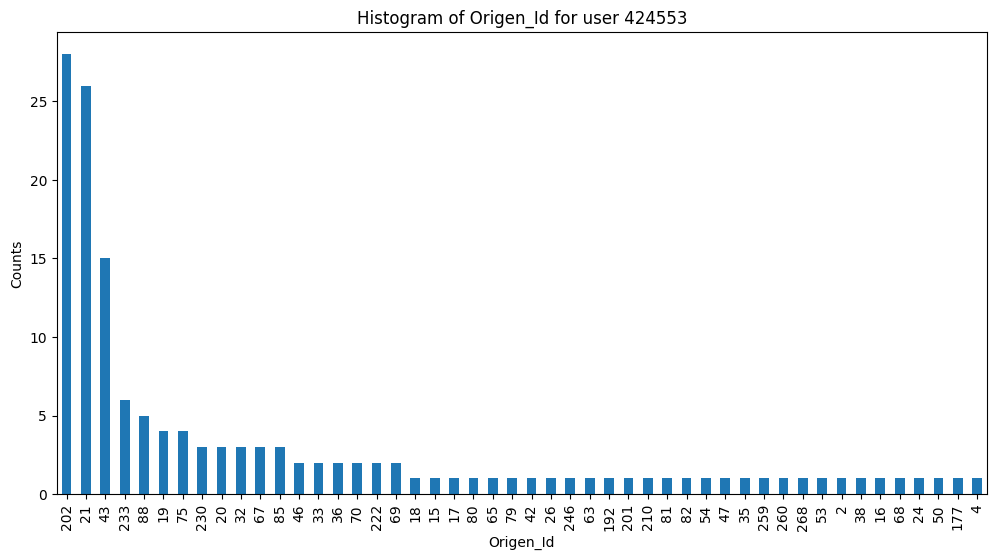

In [38]:
data_user_424553['Origen_Id'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Origen_Id')
plt.ylabel('Counts')
plt.title('Histogram of Origen_Id for user 424553')
plt.show()

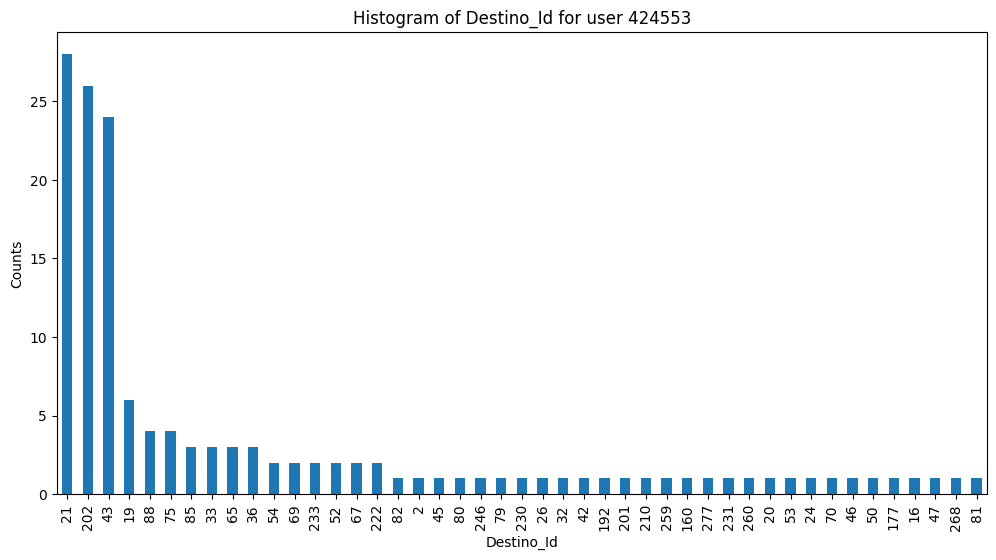

In [39]:
data_user_424553['Destino_Id'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Destino_Id')
plt.ylabel('Counts')
plt.title('Histogram of Destino_Id for user 424553')
plt.show()

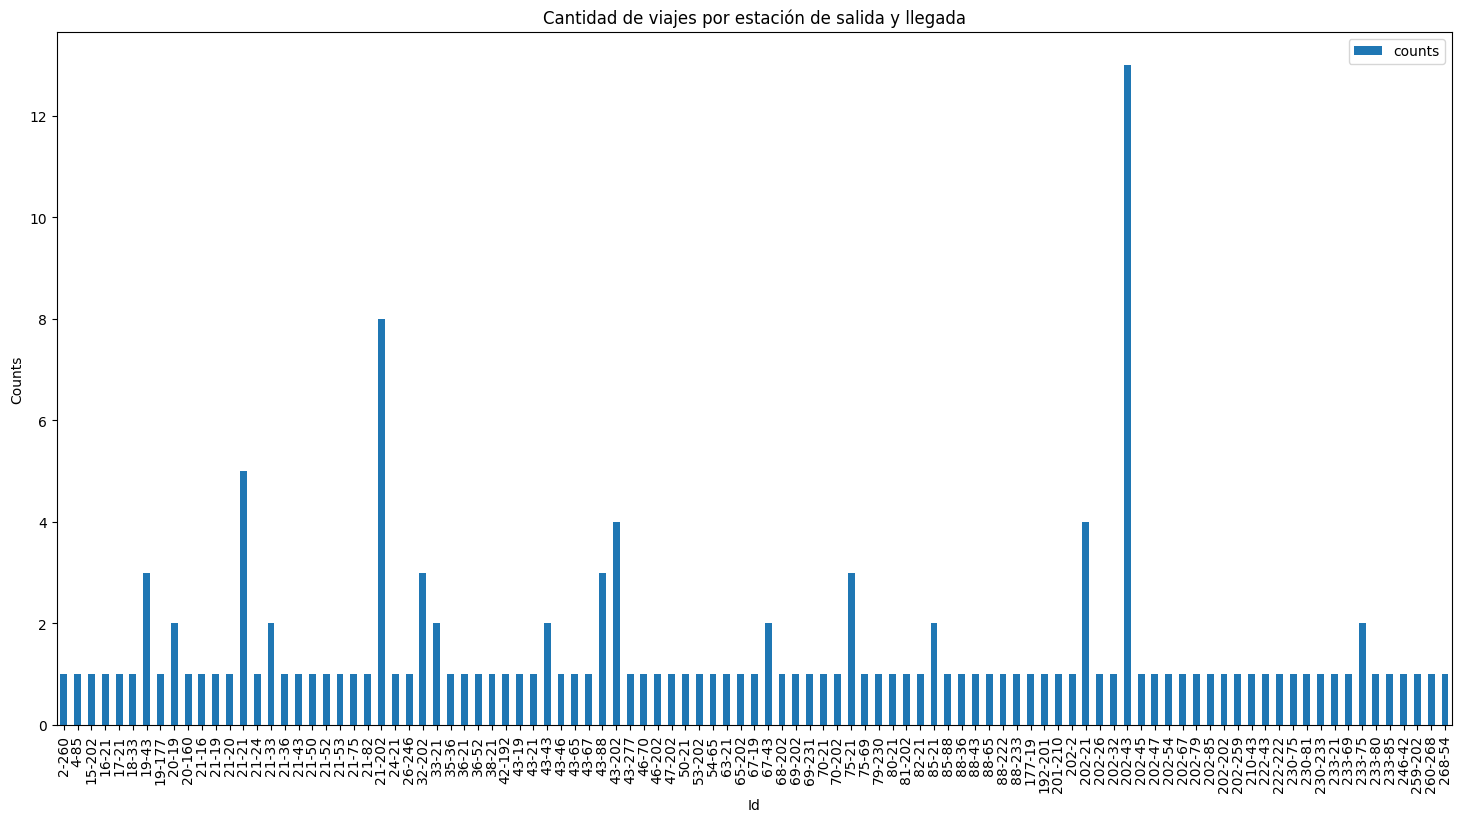

In [48]:
# Agrupar los datos por Origen_Id y Destino_Id y contar la cantidad de viajes
viajes_por_estacion = data_user_424553.groupby(['Origen_Id', 'Destino_Id']).size().reset_index(name='counts')

# Crear el histograma
viajes_por_estacion['label'] = viajes_por_estacion['Origen_Id'].astype(str) + '-' + viajes_por_estacion['Destino_Id'].astype(str)
viajes_por_estacion.plot(kind='bar', x='label', y='counts', figsize=(12*1.5, 6*1.5))
plt.xlabel('Id')
plt.ylabel('Counts')
plt.title('Cantidad de viajes por estación de salida y llegada')
plt.show()

In [47]:
viajes_por_estacion['counts'].sum()

145

In [49]:
data_user_424553.to_csv('data_user_424553.csv', index=False)

In [56]:
np.sum(users_counts <= 50)

15407